# Libraries

In [17]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt


from pkg.constants    import *
from pkg.evaluation   import Evaluation
from pkg.utils        import *

# Objeto evaluación

In [2]:
ev = Evaluation()

# Funciones necesarias

## Generación población inicial

En cada población añadimos 3 cromosomas conocidos con buenas heurísticas, calculados previamente con otros algoritmos (práctica 1)
- [16 12 19 17 20 13 12 11 10 13 14 24  2  2 22 13] -> 375.7658566586277
- [16 12 20 18 20 13 12 11  9 15 14 24  2 16  6 12] -> 378.2038511496476
- [13 12 20 21 17 14 14  8 11  8 17 24  3 11 14 13] -> 381.8566495953962

Estos cromosomas se han evaluado según la función coste (antigua), y no sobre la función fitness (nueva).

In [3]:
conocido1 = np.array([16, 12, 19, 17, 20, 13, 12, 11, 10, 13, 14, 24,  2,  2, 22, 13])
conocido2 = np.array([16, 12, 20, 18, 20, 13, 12, 11,  9, 15, 14, 24,  2, 16,  6, 12])
conocido3 = np.array([13, 12, 20, 21, 17, 14, 14,  8, 11,  8, 17, 24,  3, 11, 14, 13])

conocidos = np.array([conocido1, conocido2, conocido3])

In [4]:
poblacion = inicializa_poblacion(20, conocidos)
poblacion

array([[16, 12, 19, 17, 20, 13, 12, 11, 10, 13, 14, 24,  2,  2, 22, 13],
       [16, 12, 20, 18, 20, 13, 12, 11,  9, 15, 14, 24,  2, 16,  6, 12],
       [13, 12, 20, 21, 17, 14, 14,  8, 11,  8, 17, 24,  3, 11, 14, 13],
       [24, 13, 11, 16, 16, 16, 24, 21,  5, 19,  5,  5, 11, 13, 13,  5],
       [19,  6, 10,  6, 22,  6, 16, 10, 29, 19, 10, 13,  6, 16, 10, 22],
       [12, 16, 16,  6, 16, 19, 14,  8, 10, 16, 12, 14, 12, 10, 19, 16],
       [13, 13, 15, 13, 18, 20, 10, 20,  5, 20, 22, 10,  8, 15, 13,  5],
       [18, 18, 13, 20, 15,  8, 10,  8,  5, 18, 20, 15, 13, 18,  8, 13],
       [ 6, 28,  6, 13,  9,  9, 13, 19,  6, 13,  6, 28,  6, 22, 19, 16],
       [10, 10, 15, 17, 17, 17, 21,  5,  7, 17, 12, 19, 15, 19,  7, 12],
       [10, 15,  5, 12,  8, 22, 12, 20,  8,  8, 22, 22, 10, 18, 10, 18],
       [12, 17, 19, 16, 12, 12, 12, 12, 19, 12,  9, 14, 19,  7, 14, 14],
       [17, 15,  7,  7, 17, 12, 15, 20, 17, 10, 15, 17, 22, 10, 12,  7],
       [ 7, 20, 17, 20, 20,  7,  7, 20, 17, 15, 20,

## Evalua poblacion

In [5]:
f_poblacion, km_poblacion, slots_poblacion = evalua_poblacion(poblacion=poblacion, alpha=10, evaluation=ev)
f_poblacion, km_poblacion, slots_poblacion

(array([2575.76585666, 2578.20385115, 2581.8566496 , 2948.16885621,
        2739.45996785, 2667.15948989, 2771.67387515, 2664.48878174,
        2881.1526879 , 2684.10345387, 2735.41837949, 2704.08222383,
        2708.89423305, 2752.38581671, 2734.53245622, 2721.3607455 ,
        2678.18071203, 2640.01296147, 2745.1709683 , 2667.87619123]),
 array([375.76585666, 378.20385115, 381.8566496 , 778.16885621,
        539.45996785, 507.15948989, 571.67387515, 464.48878174,
        691.1526879 , 484.10345387, 535.41837949, 504.08222383,
        508.89423305, 572.38581671, 534.53245622, 541.3607455 ,
        488.18071203, 440.01296147, 545.1709683 , 487.87619123]),
 array([220., 220., 220., 217., 220., 216., 220., 220., 219., 220., 220.,
        220., 220., 218., 220., 218., 219., 220., 220., 218.]))

## Selección de padres

Selección aleatoria de padres. De esta forma, aquellos cromosomas con peores fitness también presentan una oportunidad de pasar su material genético.

In [6]:
padres = seleccion_padres(poblacion)
padres.shape[1]

16

## Operador de cruce

Cruce uniforme. 

A partir de 2 padres, generamos 6 hijos validos (más de 205 slots), de los cuales nos quedaremos con los 2 con menor fitness

In [16]:
hijos, fitness_hijos, km_hijos = operador_cruce(padres, ev, 10)
hijos, fitness_hijos, km_hijos

(array([[10., 10., 16., 19., 10.,  8., 12., 19.,  5., 17., 15., 22., 19.,
          5., 12., 19.],
        [10., 10., 19.,  5., 10.,  7.,  5., 19., 21., 17., 15., 24., 19.,
          5., 12., 19.]]),
 array([2663.20964596, 2723.39168028]),
 array([483.20964596, 553.39168028]))

## Mutacion

Siempre se produce mutación. 

La cantidad de genes mutados dependerá de lo buena que sea la solución (mejor fitness, menores genes mutados). Cantidad de genes mutados: entre el 5 y el 20%, es decir, entre 1 y 3 genes.

Esto es una medida de intesificación de la búsqueda (si el cromosoma tiene buen fitness en comparacion con el resto de la poblacion, se pretende seguir explorando entorno en el que se encuentra).

Además, también se considera la opción de que no se mute el hijo (5%)

In [17]:
print(hijos[0,:])
print(muta_cromosoma(hijos[0,:], 2))

[10. 10. 16. 19. 10.  8. 12. 19.  5. 17. 15. 22. 19.  5. 12. 19.]
[10. 10. 16. 21. 10.  8. 12. 19.  5. 17. 15. 22. 19.  5. 10. 19.]


In [18]:
print(hijos)
print(mutacion(f_poblacion, hijos, fitness_hijos, 2 ))

[[10. 10. 16. 19. 10.  8. 12. 19.  5. 17. 15. 22. 19.  5. 12. 19.]
 [10. 10. 19.  5. 10.  7.  5. 19. 21. 17. 15. 24. 19.  5. 12. 19.]]
[[10. 10. 16. 19. 10.  8. 12. 19.  7. 17. 15. 22. 19.  3. 12. 19.]
 [12. 10. 19.  5. 10.  7.  5. 19. 21. 17. 15. 24. 19.  5. 12. 17.]]


## Reemplazo

Reemplazo por torneo. Torneo del 20% de la población. Si el número de cromosomas participantes en el torneo es menor que 3, se establece a 3.

Cambiamos el peor cromosoma de la poblacion (fitness más alto) por el mejor hijo (fitness más bajo).

# Algoritmo Genético Básico (Estacionario)

Durante cada iteración, se escogen 2 padres de la población y se les aplica los operadores genéticos.

El/los descendientes reemplazan a uno o varios cromosoma/s de la población anterior.

Presión selectiva alta (enfoque está muy dirigido a reproducir los mejores individuos y eliminar los peores de la población). Produce una convergencia rápida cuando se reemplazan los peores cromosomas de la población.

Se ha escogido un algoritmo genético estacionario para poder introducir distintas técnicas de diversidad (respecto al cruce y a la mutación) para controlar la presión selectiva y, consecuentemente, la convergencia prematura, con distintas técnicas.

Además, usar el modelo estacionario permite realizar menos evaluaciones por iteración, lo que nos permitirá hacer más iteraciones antes de que se de el criterio de parada.

## Criterio de parada

Dos criterios de parada:
- Número máximo de evaluaciones (que la ejecución no supere la media hora).
- La varianza de la población se reduce considerablemente (var = 6).

Tiempo medio de una evaluación: 0.05094067573547363 segundos.

In [7]:
(30*60)/0.05094067573547363

35335.22031288115

Número máximo de evaluaciones por ejecución, para la ejecución final: 35000.

Para el ajuste de parámetros, usaremos un número reducido de evaluaciones máximas: 20000.



## Ajuste de parámetros

El ajuste de parámetros se hará con una sola semilla. Una vez ajustados, se procederá a lanzar el algoritmo con distintas semillas, con el objetivo de sacar estadísticos de los resultados.

In [4]:
seed = 4052022
np.random.seed(seed)

Parámetros a ajustar:
- Valor alpha del fitness (ajustado)
- Tamaño de la población (ajustado)


### Ajuste de Alpha para el fitness

Podemos ajustar el valor de alpha mediante el operador de cruce, asegurandonos que los hijos que se obtengan esten dentro de un rango [205,220], pudiendo admitir valores un poco superiores al límite superior.

In [11]:
alphas = [10, 12.5, 15, 17.5, 20, 22.5]

np.random.seed(seed)

slots = []
medias = []
std = []

for alpha in alphas:

    print(alpha)

    for i in range(100):
        hijos, fitness, km = operador_cruce(padres,ev,alpha)
        

        for hijo in hijos:
            slots = np.append(slots, hijo.sum())
    

    medias = np.append(medias, np.mean(slots))
    std    = np.append(std, np.std(slots))
    
    slots = []

print(f'medias: {medias}')
print(f'desviaciones tipicas: {std}')


10


KeyboardInterrupt: 

Observamos que conforme aumenta el alpha, el número medio de slots que se obtiene disminuye. Nos quedamos con **alpha = 20** porque los slots de los hijos generados se encuentran en el rango [205, 215.195 + 7.21828234] -> [205, 222.41328234], siendo 222 un número de slots muy cercano al deseado (220)

**ACTUALIZACIÓN**
Con un alpha tan alto, a la hora de ejecutar el algoritmo, este da mucha prioridad a la penalización por el número de slots de las estaciones y pierde peso la distancia recorrida por los usuarios. Por lo que se ha considerado a partir de ahora un alpha = 9. 

In [12]:
alphas = [7,8,9]

np.random.seed(seed)

slots = []
medias = []
std = []

for alpha in alphas:

    print(alpha)

    for i in range(100):
        hijos, fitness, km = operador_cruce(padres,ev,alpha)

        for hijo in hijos:
            slots = np.append(slots, hijo.sum())
    

    medias = np.append(medias, np.mean(slots))
    std    = np.append(std, np.std(slots))
    
    slots = []

print(f'medias: {medias}')
print(f'desviaciones tipicas: {std}')

7
8
9
medias: [226.49  223.92  222.155]
desviaciones tipicas: [9.78058792 9.62619343 8.34331918]


In [5]:
alpha = 9

### Ajuste del tamaño de la población

In [6]:
# Posibles tamaños de la poblacion
tam_poblacion = np.array([18,24,30])

Medidas estadísticas estudiadas para el ajuste de parámetros, por cada iteración:
- Media del fitness de la población.
- Varianza del fitness de la población.
- Mejor fitness de la población



In [15]:
def agb_estacionario(poblacion, alpha, evaluation, grafica):

    ev.total_calls = 0

    t = 0

    # estadisticos 
    media_fitness    = []
    var_fitness      = []
    mejor_fitness    = []


    fitness_poblacion, km_poblacion, slots_poblacion = evalua_poblacion(
        poblacion = poblacion,
        alpha = alpha,
        evaluation= evaluation)

    varianza = np.var(fitness_poblacion)
    
    # actualizacion estadisticos
    media_fitness = np.append(media_fitness, np.mean(fitness_poblacion))
    var_fitness   = np.append(var_fitness, np.var(fitness_poblacion))
    mejor_fitness = np.append(mejor_fitness, np.min(fitness_poblacion))



    while evaluation.total_calls < 10000:
        t += 1
        
        padres = seleccion_padres(poblacion)
        hijos, fitness_hijos, km_hijos = operador_cruce(padres, evaluation, alpha)

        hijos = mutacion(\
            fitness_poblacion, hijos, fitness_hijos, granularidad=2)
        
        fitness_hijos, km_h, s_h = evalua_poblacion(hijos, evaluation, alpha)
        

        poblacion, fitness_poblacion = reemplazo(0.2, poblacion,fitness_poblacion, hijos, fitness_hijos)

        varianza = np.var(fitness_poblacion)
        # print(f'varianza: {varianza}')

        if varianza < 6:
            break
        

        # actualizacion estadisticos
        media_fitness = np.append(media_fitness, np.mean(fitness_poblacion))
        var_fitness   = np.append(var_fitness, np.var(fitness_poblacion))
        mejor_fitness = np.append(mejor_fitness, np.min(fitness_poblacion))

        # print(np.min(fitness_poblacion))

        # print(ev.total_calls)
        
     
    
    if grafica is True:
        # REPRESENTACION GRAFICA DE LOS RESULTADOS
        x = list(range(len(media_fitness)))
        
        fig, (media_f, var, mejor) = plt.subplots(3, 1)
        fig.align_ylabels

        media_f.plot(list(range(len(media_fitness))), media_fitness, color='C1')
        media_f.set_ylabel('Mean fitness')

        var.plot(list(range(len(var_fitness))),var_fitness, color='C2')
        var.set_ylabel('Var fitness')

        mejor.plot(list(range(len(mejor_fitness))),mejor_fitness, color='C0')
        mejor.set_ylabel('Best fitness')
        mejor.set_xlabel('Épocas')



    
    i_mejor_fitness = np.argmin(fitness_poblacion)

    mejor_fitness = fitness_poblacion[i_mejor_fitness]
    mejor_cromosoma = poblacion[i_mejor_fitness,:].copy()

    return mejor_cromosoma, mejor_fitness

[[16 12 19 17 20 13 12 11 10 13 14 24  2  2 22 13]
 [16 12 20 18 20 13 12 11  9 15 14 24  2 16  6 12]
 [13 12 20 21 17 14 14  8 11  8 17 24  3 11 14 13]
 [ 9 27 18  9 18  9 18 24  9 21 12  6  9  6  6 18]
 [10 10  5 23 23  5  5 23 20 18 15 20  8  8 13 13]
 [ 6 15 28  6 21  6  9 24 15 24 15  9  9  9 15  6]
 [19 13  6 22  6 19  6  9 19 19 13 16 22  9 13  9]
 [19 11 24 11  8  8  6 11 25 16 11 11 25 14  6 14]
 [ 5  9  7  7 21  9 19 21  5  9 16 21 16 21 16 16]
 [16 14  8 18 18 14 18 16  8 14 10  4 18 14 18 12]
 [ 5  5 20 13 23  8 20 13 15 23 13  8 15 15 18  5]
 [12 22 20 12  5 12  5 20  7 10 15 12  7 22 22 15]
 [15  5 22 15  8 20 20 10  8 15 23  8 13 20 10  8]
 [12 15  6 12 12 12 12 28 15  6  9  6  6 28 12 28]
 [ 8 11 22 25 11 16  8 14 16 14  8  6 11 14 19 16]
 [12 15 20  5 12 10 12 10 15 15 17 10 15 15 20 17]
 [ 8 14 14 14 16 22  8  8 22  8 16 11 19 19  6 14]
 [ 5 20 22 20 22 22 20 10  7 15 10 10 10  5 15  7]]
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.7658

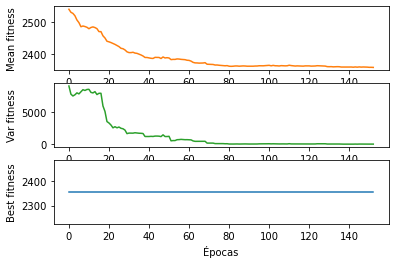

In [8]:
np.random.seed(seed)

poblacion = inicializa_poblacion(tam_poblacion[0], conocidos)
print(poblacion)
crom, fit = agb_estacionario(poblacion, alpha, ev,True)



In [9]:
print(f'tamaño: {tam_poblacion[0]}, fitness mejor: {fit}')
print(crom)

tamaño: 18, fitness mejor: 2355.765856658628
[16 12 19 17 20 13 12 11 10 13 14 24  2  2 22 13]


2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.76585

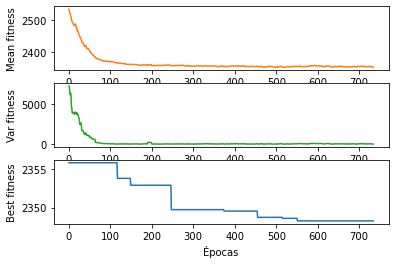

In [10]:
np.random.seed(seed)

poblacion = inicializa_poblacion(tam_poblacion[1], conocidos)
crom, fit = agb_estacionario(poblacion, alpha, ev,True)



In [11]:
print(f'tamaño: {tam_poblacion[1]}, fitness mejor: {fit}')
print(crom)

tamaño: 24, fitness mejor: 2348.2824231578084
[16 12 20 20 20 14 13 11 12 15 14 22  2 16  4 12]


2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.765856658628
2355.76585

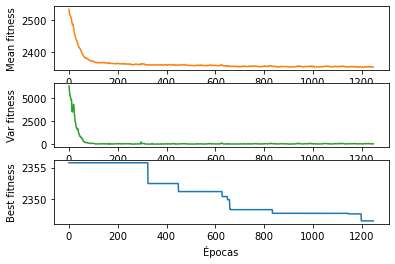

In [12]:
np.random.seed(seed)

poblacion = inicializa_poblacion(tam_poblacion[2], conocidos)
crom, fit = agb_estacionario(poblacion, alpha, ev,True)



In [13]:
print(f'tamaño: {tam_poblacion[2]}, fitness mejor: {fit}')
print(crom)

tamaño: 30, fitness mejor: 2346.61388781709
[18 12 20 18 20 13 12 10 12 15 14 24  2 16  6 11]


In [18]:
tama_final = tam_poblacion[1]

# Experimentacion

In [16]:
seeds = np.array([7054, 1354, 23503, 11268, 58283])

In [19]:
costs       = np.array([])
evaluations = np.array([])
slots       = np.array([])

for s in seeds:

    # set evauation calls counter to 0
    ev.total_calls = 0

    np.random.seed(s)

    poblacion = inicializa_poblacion(tama_final, conocidos)
    crom, fit = agb_estacionario(poblacion, alpha, ev,False)

    print(crom)
    print(fit)

    value, total_distance, slot = ev.fitness(crom,alpha)
    
    costs       = np.append(costs, total_distance)
    evaluations = np.append(evaluations, ev.total_calls)
    slots       = np.append(slots, slot)


df = pd.DataFrame({
    "ev_medias"    : [evaluations.mean()],
    "ev_mejor"     : [evaluations.min()],
    "ev_std"       : [evaluations.std()],
    "coste_medio"  : [costs.mean()],
    "coste_mejor"  : [costs.min()],
    "coste_std"    : [costs.std()],
    "slots_medio"  : [slots.mean()],
    "slots_min"    : [slots.min()],
    "slots_std"    : [slots.std()]
})

df_2 = pd.DataFrame({
    'Ejecución'    : [1,2,3,4,5],
    "Coste mejor"  : costs,
    "Evaluaciones" : evaluations,
    "slots"        : slots
})

[18 12 20 18 20 14 10 11 12 15 14 24  2 16  6 11]
2346.7005924785626
[18 12 20 19 20 13 10 11 14 13 14 24  3 14  6 12]
2354.7930747472947
[18 12 17 18 20 13 12 11 12 15 14 24  2  2 20 13]
2347.798987797564
[18 12 18 17 20 15 10 11 13 15 14 24  2  2 20 12]
2350.5065533091015
[18 12 20 16 20 13 12 11 12 15 14 24  2 18  6 10]
2347.0670279590554


In [20]:
df

,ev_medias,ev_mejor,ev_std,coste_medio,coste_mejor,coste_std,slots_medio,slots_min,slots_std
0,5874.6,921.0,2766.10062,342.373247,339.700592,3.019899,223.0,223.0,0.0


In [21]:
df_2

,Ejecución,Coste mejor,Evaluaciones,slots
0,1,339.700592,9097.0,223.0
1,2,347.793075,921.0,223.0
2,3,340.798988,6209.0,223.0
3,4,343.506553,5513.0,223.0
4,5,340.067028,7633.0,223.0


In [22]:
df.to_excel('./01_stats_p2/agb_stats.xlsx')
df_2.to_excel('./01_stats_p2/agb_ejecuciones.xlsx')